In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_file_listings_path = "/Users/Edo/Resources/listings.csv"
data_file_listings_path

'/Users/Edo/Resources/listings.csv'

In [3]:
#!pwd to check the working directory

raw_df = pd.read_csv(data_file_listings_path)
print(f"The dataset contains {len(raw_df)} Airbnb listings")
pd.set_option('display.max_columns', len(raw_df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
raw_df.head(3)

The dataset contains 18665 Airbnb listings


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35797,https://www.airbnb.com/rooms/35797,20210718171536,2021-07-19,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,https://www.airbnb.com/users/show/153786,Dici,2010-06-28,"Mexico City, Mexico City, Mexico","Master in visual arts, film photography & Mark...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/00de1...,https://a0.muscache.com/im/pictures/user/00de1...,NaN,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Mexico City, D.f., Mexico",Cuajimalpa de Morelos,NaN,19.38283,-99.27178,Entire villa,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Bed linens"", ""Free parking on premises"", ""Wi...","$3,979.00",1,7,1,1,7,7,1.0,7.0,NaN,t,28,58,88,363,2021-07-19,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
1,44616,https://www.airbnb.com/rooms/44616,20210718171536,2021-07-18,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,https://www.airbnb.com/users/show/196253,Condesa Haus Bed & Breakfast CDMX,2010-08-09,"Mexico City, Distrito Federal, Mexico",Condesa Haus is Bed & Breakfast located on th...,within a day,90%,73%,f,https://a0.muscache.com/im/users/196253/profil...,https://a0.muscache.com/im/users/196253/profil...,Condesa,9.0,9.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,NaN,Cuauhtémoc,NaN,19.41162,-99.17794,Entire house,Entire home/apt,14,NaN,5.5 baths,5.0,8.0,"[""Coffee maker"", ""TV"", ""Piano"", ""Long term sta...","$13,000.00",1,365,1,1,365,365,1.0,365.0,NaN,t,30,55,85,355,2021-07-18,49,2,0,2020-10-13,2020-03-03,4.55,4.51,4.69,4.83,4.75,4.98,4.44,NaN,f,10,2,1,0,5.27
2,56074,https://www.airbnb.com/rooms/56074,20210718171536,2021-07-19,Great space in historical San Rafael,This great apartment is located in one of the ...,Very traditional neighborhood with all service...,https://a0.muscache.com/pictures/3005118/60dac...,265650,https://www.airbnb.com/users/show/265650,Maris,2010-10-19,"Mexico City, Mexico City, Mexico",I am a University Professor now retired after ...,within an hour,100%,100%,t,https://a0.muscache.com/im/users/265650/profil...,https://a0.muscache.com/im/users/265650/profil...,San Rafael,2.0,2.0,"['email', 'phone', 'facebook', 'reviews']",t,t,"Mexico City, DF, Mexico",Cuauhtémoc,NaN,19.43977,-99.15605,Entire condominium,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Coffee maker"", ""TV"", ""Extra pillows and blan...",$379.00,2,250,2,2,250,250,2.0,250.0,NaN,t,4,15,38,311,2021-07-19,58,2,0,2012-01-16,2019-02-21,4.86,4.93,4.93,4.96,4.91,4.67,4.76,NaN,f,2,2,0,0,0.50


In [4]:
cols_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'name','description', 'neighborhood_overview',
                'picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 
                'host_thumbnail_url', 'host_picture_url','number_of_reviews_l30d',
                'host_neighbourhood', 'host_verifications', 'calendar_last_scraped']
df = raw_df.drop(cols_to_drop, axis=1)

In [5]:

df.isna().sum()

id                                                  0
host_since                                         13
host_response_time                               4046
host_response_rate                               4046
host_acceptance_rate                             4585
host_is_superhost                                  13
host_listings_count                                13
host_total_listings_count                          13
host_has_profile_pic                               13
host_identity_verified                             13
neighbourhood                                    6096
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                    18665
latitude                                            0
longitude                                           0
property_type                                       0
room_type                                           0
accommodates                                        0
bathrooms                   

In [6]:
#Columns with several NULL entries are dropped too.
df.drop(['bathrooms', 'host_acceptance_rate', 'neighbourhood_group_cleansed', 
        'calendar_updated', 'license'], axis=1, inplace=True)

df.set_index('id', inplace=True) # ID as index

In [7]:
df.isna().sum()

host_since                                        13
host_response_time                              4046
host_response_rate                              4046
host_is_superhost                                 13
host_listings_count                               13
host_total_listings_count                         13
host_has_profile_pic                              13
host_identity_verified                            13
neighbourhood                                   6096
neighbourhood_cleansed                             0
latitude                                           0
longitude                                          0
property_type                                      0
room_type                                          0
accommodates                                       0
bathrooms_text                                    27
bedrooms                                         746
beds                                             337
amenities                                     

In [8]:
print(sum((df.host_listings_count == df.host_total_listings_count) == False))
df.loc[((df.host_listings_count == df.host_total_listings_count) == False)][:5]

13


,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
19073859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Colonia Periodista, Ciudad de México, Mexico",Benito Juárez,19.38113,-99.14729,Private room in guest suite,Private room,1,1 private bath,1.0,1.0,"[""Coffee maker"", ""Long term stays allowed"", ""E...",$210.00,1,1125,1,1,1125,1125,1.0,1125.0,t,18,48,78,353,27,8,2017-10-31,2019-12-20,5.0,5.0,4.93,4.96,5.0,4.96,4.85,f,1,0,1,0,0.6
40406871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benito Juárez,19.38664,-99.14579,Shared room in apartment,Shared room,2,1 shared bath,1.0,0.0,"[""TV"", ""Long term stays allowed"", ""Wifi"", ""Ess...","$1,500.00",1,1125,1,1,1125,1125,1.0,1125.0,t,30,60,90,180,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1,0,0,1,NaN
47818135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cuauhtémoc,19.42171,-99.17345,Private room in bed and breakfast,Private room,2,1 private bath,NaN,1.0,"[""Bed linens"", ""Long term stays allowed"", ""Air...","$35,090.00",1,365,1,1,365,365,1.0,365.0,t,0,0,2,276,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,11,0,11,0,NaN
47818526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Venustiano Carranza,19.43637,-99.11491,Room in hotel,Private room,1,1 private bath,1.0,1.0,"[""Bed linens"", ""Long term stays allowed"", ""Gym...","$35,053.00",1,365,1,1,365,365,1.0,365.0,t,0,0,0,274,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,11,0,11,0,NaN
48410368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cuauhtémoc,19.43720,-99.15116,Private room in bed and breakfast,Private room,2,1 private bath,NaN,1.0,"[""Coffee maker"", ""Bed linens"", ""Long term stay...","$35,090.00",1,365,1,1,365,365,1.0,365.0,t,0,0,1,274,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,11,0,11,0,NaN


In [9]:
# host_listings_count and host_total_listings_count are the same in all but 248 cases. 
#These cases are those where the value is NaN. Therefore one of these columns can be dropped. 
#Other columns which split these into type of property will also be dropped, 
#as they will be highly correlated (one will be the total of the others).

df.drop(['host_total_listings_count', 'calculated_host_listings_count', 
         'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 
         'calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)

In [10]:
#Columns for property location can be dropped because one column for area will be kept, neighboorhood_cleansed
df.drop(['latitude', 'longitude', 'neighbourhood'], axis=1, inplace=True)

In [11]:
sum((df.minimum_nights == df.minimum_minimum_nights) == False)

421

In [12]:
df.drop(['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 
         'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)

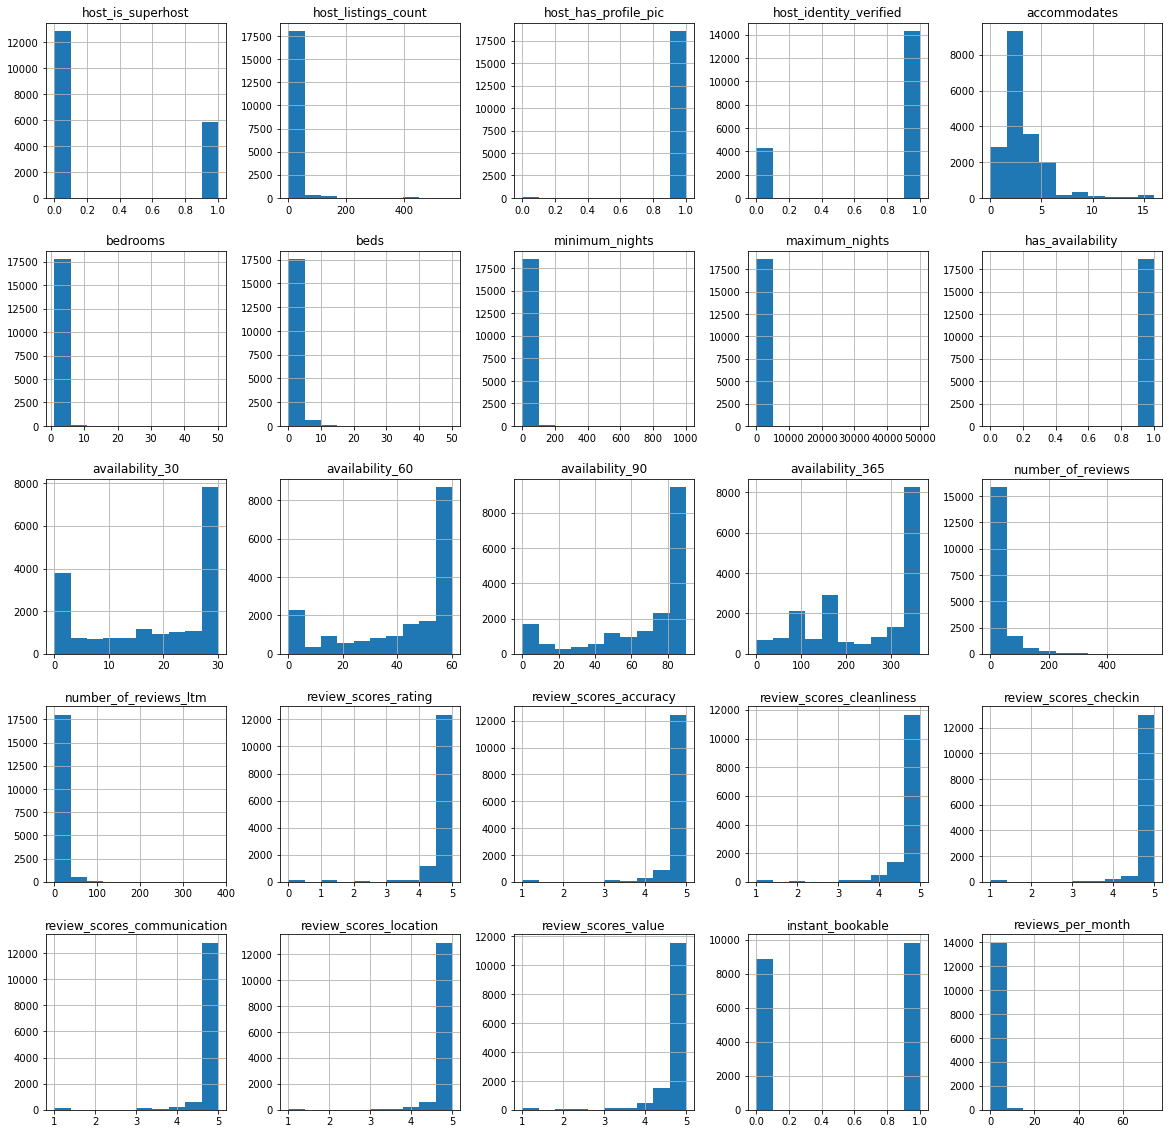

In [13]:
# Replacing columns with f/t with 0/1
df.replace({'f': 0, 't': 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
df.hist(figsize=(20,20));

In [14]:
df.drop(['has_availability', 'host_has_profile_pic'], axis=1, inplace=True)

In [15]:
df.isna().sum()

host_since                       13
host_response_time             4046
host_response_rate             4046
host_is_superhost                13
host_listings_count              13
host_identity_verified           13
neighbourhood_cleansed            0
property_type                     0
room_type                         0
accommodates                      0
bathrooms_text                   27
bedrooms                        746
beds                            337
amenities                         0
price                             0
minimum_nights                    0
maximum_nights                    0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
number_of_reviews_ltm             0
first_review                   4589
last_review                    4589
review_scores_rating           4589
review_scores_accuracy         4735
review_scores_cleanliness   

Cleaning each of the columns 

host_since

This is a datetime column, and will be converted into a measure of the number of days that a host has been on the platform, measured from the date that the data was scraped (July , 2021). The original column will be left in initially for EDA, and dropped later.

host_response_time
About a third of rows don't have a value for host_response_time, and the majority of these have also not yet been reviewed.

In [16]:

print("Null values:", df.host_response_time.isna().sum())
print(f"Proportion: {round((df.host_response_time.isna().sum()/len(df))*100, 1)}%")

# Number of rows without a value for host_response_time which have also not yet had a review
len(df[df.loc[ :,['host_response_time', 'first_review'] ].isnull().sum(axis=1) == 2])

Null values: 4046
Proportion: 21.7%


1787

In [17]:
df.host_response_time.fillna("unknown", inplace=True)
df.host_response_time.value_counts(normalize=True)

within an hour        0.526815
unknown               0.216769
within a few hours    0.099062
within a day          0.085133
a few days or more    0.072221
Name: host_response_time, dtype: float64

In [18]:
df.host_response_time.value_counts(normalize=True)


within an hour        0.526815
unknown               0.216769
within a few hours    0.099062
within a day          0.085133
a few days or more    0.072221
Name: host_response_time, dtype: float64

host_response_rate
The same story for host_response_rate, with about a third of values being null. This will also be kept as its own category. Because about 75% of hosts respond 100% of the time, this will be kept as its own category, and other values will be grouped into bins.

In [19]:
print("Null values:", df.host_response_rate.isna().sum())
print(f"Proportion: {round((df.host_response_rate.isna().sum()/len(df))*100, 1)}%")

Null values: 4046
Proportion: 21.7%


In [20]:
# Removing the % sign from the host_response_rate string and converting to an integer
df.host_response_rate = df.host_response_rate.str[:-1].astype('float64')

print("Mean host response rate:", round(df['host_response_rate'].mean(),0))
print("Median host response rate:", df['host_response_rate'].median())
print(f"Proportion of 100% host response rates: {round(((df.host_response_rate == 100.0).sum()/df.host_response_rate.count())*100,1)}%")

Mean host response rate: 88.0
Median host response rate: 100.0
Proportion of 100% host response rates: 67.9%


In [21]:
# Bin into four categories
df.host_response_rate = pd.cut(df.host_response_rate, 
                               bins=[0, 50, 90, 99, 100], 
                               labels=['0-49%', '50-89%', '90-99%', '100%'], 
                               include_lowest=True)

# Converting to string
df.host_response_rate = df.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df.host_response_rate.replace('nan', 'unknown', inplace=True)

# Category counts
df.host_response_rate.value_counts()

100%       9929
unknown    4046
0-49%      1630
50-89%     1617
90-99%     1443
Name: host_response_rate, dtype: int64

host_is_superhost
There are 21 rows NA values for each of five different host-related features. These rows will be dropped.

In [22]:
# Number of rows without a value for multiple host-related columns
len(df[df.loc[ :,['host_since', 'host_is_superhost', 'host_listings_count', 
                  'host_identity_verified'] ].isnull().sum(axis=1) == 5])

0

In [23]:
df.dropna(subset=['host_since'], inplace=True)


property_type

Some cleaning of property types is required as there are a large number of categories with only a few listings. The categories Apartment, House and Other will be used, as most properties can be classified as either apartment or house.

In [24]:
df.property_type.value_counts()


Entire apartment                      6762
Private room in apartment             3545
Private room in house                 2190
Entire condominium                    1113
Entire loft                           1067
Private room in condominium            559
Entire house                           491
Private room in guest suite            325
Entire serviced apartment              276
Entire guest suite                     260
Room in boutique hotel                 226
Room in hotel                          178
Private room in serviced apartment     170
Private room in bed and breakfast      144
Private room in loft                   138
Private room in guesthouse             132
Shared room in apartment               115
Shared room in house                    85
Room in serviced apartment              78
Entire guesthouse                       77
Room in aparthotel                      77
Private room in hostel                  76
Private room in townhouse               68
Shared room

In [25]:
# Replacing categories that are types of houses or apartments
df.property_type.replace({
    'Entire apartment': 'Apartment',
    'Private room in apartment': 'Apartment',
    'Private room in house': 'House',
    'Entire condominium': 'House',
    'Entire loft': 'Apartment',
    'Private room in condominium': 'Apartment',
    'Entire house': 'House',
    'Private room in guest suite': 'Apartment',
    'Entire serviced apartment': 'Apartment',
    'Entire guest suite': 'House',
    'Private room in serviced apartment': 'Apartment',
    'Private room in loft':  'Apartment',
    'Private room in guesthouse': 'House',
    'Shared room in apartment': 'Apartment',
    'Shared room in house': 'House',
    'Room in serviced apartment': 'Apartment',
    'Entire guesthouse': 'House',
    'Private room in townhouse': 'House',
    'Private room in tiny house': 'House',
    'Entire townhouse': 'House', 
    'Private room': 'House',
    'Tiny house': 'House',
    'Shared room in guesthouse': 'House',
    'Casa particular (Cuba)': 'House',
    'Private room in farm stay': 'House',
    'Private room in villa': 'House',
    'Private room in hut': 'House',
    'Private room in dome house': 'House',
    'Private room in bungalow': 'House',
    'Entire villa': 'House',
    'Room in casa particular': 'House',
    'Entire villa': 'House',
    'Shared room in serviced apartment': 'Apartment',
    'Dome house': 'House'
    }, inplace=True)

In [26]:
# Replacing other categories with 'other'
df.loc[~df.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'

bathrooms, bedrooms and beds
Missing values will be replaced with the median (to avoid strange fractions).

In [27]:
for col in ['bedrooms', 'beds']:
    df[col].fillna(df[col].median(), inplace=True)

amenities

Amenities is a list of additional features in the property, i.e. whether it has a TV or parking. Examples are below:

In [28]:
# Example of amenities listed
df.amenities[:1].values

array(['["Bed linens", "Free parking on premises", "Wifi", "Kitchen", "Indoor fireplace", "Hot water", "Pocket wifi", "Washer"]'],
      dtype=object)

In [29]:
# Creating a set of all possible amenities
amenities_list = list(df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'Refrigerator] [Paid washer \\u2013 In building',
 'Pantene conditioner',
 'Elvive',
 'Varias  body soap',
 'safeguar body soap',
 'Integrado a la estufa stainless steel oven',
 'Wifi \\u2013 20000 Mbps',
 'Neutro',
 'Mabbe stainless steel oven',
 'Wifi \\u2013 36 Mbps',
 'Kitchen] [Wifi',
 'Hot water] [Breakfast',
 'Luggage dropoff allowed] [Children\\u2019s books and toys for ages 5-10 years old',
 'Microwave] [Free parking on premises',
 'Luggage dropoff allowed] [Cleaning before checkout',
 'Alexa Bluetooth sound system',
 "it's shampoo & hair conditioner Head & Shoulders conditioner",
 'sonos sound system with Bluetooth and aux',
 'Shower gel] [Essentials',
 '105\\ HDTV with standard cable',
 '42\\ HDTV',
 'Stainless steel induction stove',
 'Bueno conditioner',
 'L\\u00b4Occitane  body soap',
 'Patio or balcony] [Gym',
 'Sound system with Bluetooth and aux',
 'Hair dryer] [Wifi',
 'Acros gas stove',
 'Washer] [Coffee maker',
 'Baby monitor',
 'pero permite hacer platillos sencil

In [30]:
df.loc[df['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
df.loc[df['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
df.loc[df['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
df.loc[df['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
df.loc[df['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
df.loc[df['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
df.loc[df['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
df.loc[df['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
df.loc[df['amenities'].str.contains('TV'), 'tv'] = 1
df.loc[df['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
df.loc[df['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
df.loc[df['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
df.loc[df['amenities'].str.contains('Elevator'), 'elevator'] = 1
df.loc[df['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
df.loc[df['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
df.loc[df['amenities'].str.contains('parking'), 'parking'] = 1
df.loc[df['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
df.loc[df['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
df.loc[df['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
df.loc[df['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
df.loc[df['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
df.loc[df['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
df.loc[df['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
df.loc[df['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
df.loc[df['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
df.loc[df['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
df.loc[df['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

/Users/Edo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [31]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = df.iloc[:,41:].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)

# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in df.iloc[:,41:].columns:
    if df[col].sum() < len(df)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)

# Dropping infrequent amenity features
df.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
df.drop('amenities', axis=1, inplace=True)

['breakfast', 'child_friendly', 'outdoor_space', 'hot_tub_sauna_or_pool', 'pets_allowed', 'secure', 'self_check_in', 'smoking_allowed', 'accessible', 'event_suitable']


In [32]:
df.columns[40:]


Index(['tv', 'coffee_machine', 'cooking_basics', 'white_goods', 'elevator',
       'gym', 'parking', 'host_greeting', 'internet', 'long_term_stays',
       'private_entrance'],
      dtype='object')

price
Price will be converted to an integer. Currently it is a string because there is a currency sign.


In [33]:
df.price = df.price.str[1:-3]
df.price = df.price.str.replace(",", "")
df.price = df.price.astype('int64')

availability
There are multiple different measures of availability, which will be highly correlated with each other. Only one will be retained, availability for 90 days (availability_90)

In [34]:
df.drop(['availability_30', 'availability_60', 'availability_365'], axis=1, inplace=True)


first_review and last_review¶


In [35]:
print(f"Null values in 'first_review': {round(100*df.first_review.isna().sum()/len(df),1)}%")
print(f"Null values in 'review_scores_rating': {round(100*df.review_scores_rating .isna().sum()/len(df),1)}%")

Null values in 'first_review': 24.5%
Null values in 'review_scores_rating': 24.5%


In [36]:
df.first_review = pd.to_datetime(df.first_review) # Converting to datetime

# Calculating the number of days between the first review and the date the data was scraped
df['time_since_first_review'] = (pd.datetime(2019, 4, 9) - df.first_review).astype('timedelta64[D]')

<ipython-input-36-ab0fb38fb16b>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df['time_since_first_review'] = (pd.datetime(2019, 4, 9) - df.first_review).astype('timedelta64[D]')


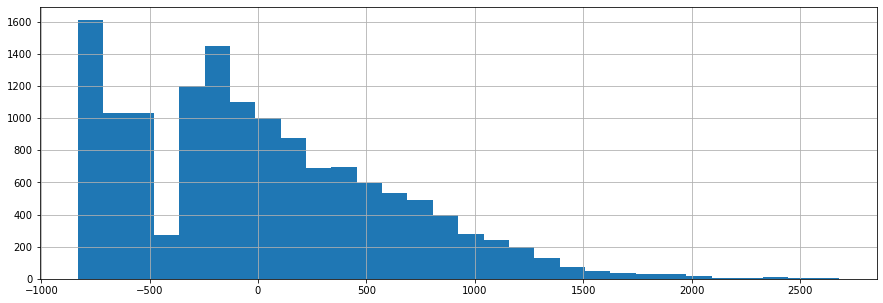

In [37]:
# Distribution of the number of days since first review
df.time_since_first_review.hist(figsize=(15,5), bins=30);


In [38]:
def bin_column(col, bins, labels, na_label='unknown'):
    """
    Takes in a column name, bin cut points and labels, replaces the original column with a
    binned version, and replaces nulls (with 'unknown' if unspecified).
    """
    df[col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    df[col] = df[col].astype('str')
    df[col].fillna(na_label, inplace=True)

In [39]:
# Binning time since first review
bin_column('time_since_first_review',
           bins=[0, 182, 365, 730, 1460, max(df.time_since_first_review)],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'],
           na_label='no reviews')

<ipython-input-40-25488990723f>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df['time_since_last_review'] = (pd.datetime(2019, 4, 9) - df.last_review).astype('timedelta64[D]')


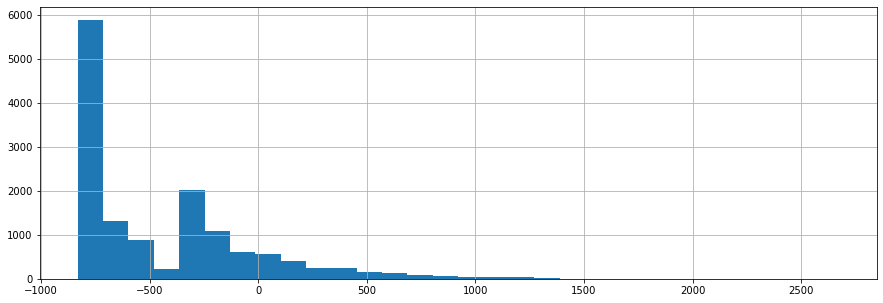

In [40]:
df.last_review = pd.to_datetime(df.last_review) # Converting to datetime

# Calculating the number of days between the most recent review and the date the data was scraped
df['time_since_last_review'] = (pd.datetime(2019, 4, 9) - df.last_review).astype('timedelta64[D]')

# Distribution of the number of days since last review
df.time_since_last_review.hist(figsize=(15,5), bins=30);

In [41]:
# Binning time since last review
bin_column('time_since_last_review',
           bins=[0, 14, 60, 182, 365, max(df.time_since_last_review)],
           labels=['0-2 weeks',
                   '2-8 weeks',
                   '2-6 months',
                   '6-12 months',
                   '1+ year'],
           na_label='no reviews')

In [42]:
# Dropping last_review - first_review will be kept for EDA and dropped later
df.drop('last_review', axis=1, inplace=True)

review ratings columns
As above, listings without reviews will be kept and replaced with unknown. Other ratings will be grouped into bins. The histograms below were produced in order to decide on useful bins. The majority of ratings are 9 or 10 out of 10, as also seen in the value count below. Therefore for these columns, 9/10 and 10/10 will be kept as separate groups, and 1-8/10 will be binned together (as this is, by Airbnb standards, a 'low' rating).

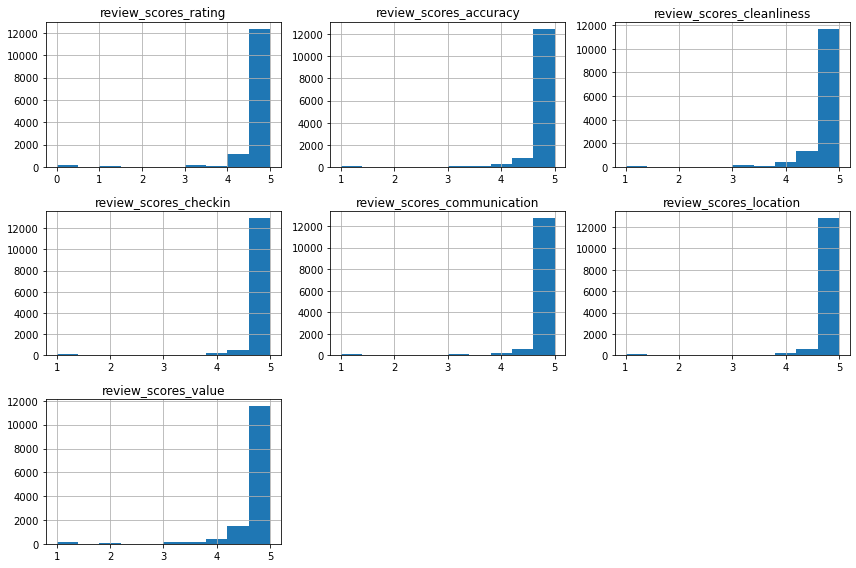

In [43]:
# Checking the distributions of the review ratings columns
variables_to_plot = list(df.columns[df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [44]:
# Creating a list of all review columns that are scored out of 10
variables_to_plot.pop(0)

'review_scores_rating'

In [45]:
# Binning for all columns scored out of 10
for col in variables_to_plot:
    bin_column(col,
               bins=[0, 8, 9, 10],
               labels=['0-8/10', '9/10', '10/10'],
               na_label='no reviews')

In [46]:
# Binning column scored out of 100
bin_column('review_scores_rating',
           bins=[0, 80, 95, 100],
           labels=['0-79/100', '80-94/100', '95-100/100'],
           na_label='no reviews')

number_of_reviews_ltm and reviews_per_month¶


In [47]:
df.drop(['number_of_reviews_ltm', 'reviews_per_month'], axis=1, inplace=True)


In [48]:
df.head()
df.dtypes

host_since                             object
host_response_time                     object
host_response_rate                     object
host_is_superhost                     float64
host_listings_count                   float64
host_identity_verified                float64
neighbourhood_cleansed                 object
property_type                          object
room_type                              object
accommodates                            int64
bathrooms_text                         object
bedrooms                              float64
beds                                  float64
price                                   int64
minimum_nights                          int64
maximum_nights                          int64
availability_90                         int64
number_of_reviews                       int64
first_review                   datetime64[ns]
review_scores_rating                   object
review_scores_accuracy                 object
review_scores_cleanliness         

In [49]:
# Save cleaned dataset
listings_cleaned = df.to_csv(r'/Users/Edo/Resources/listings_cleaned.csv', index=id, header=True)